In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd

In [4]:
data = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/ЛР2 ПАД_Исходные данные_Бухов.xlsx')
Y = data['Ybin'] # таргет
X = data.iloc[:, 0:9] # переменные
data.head(6)

,х1,х2,х3,х4,х5,х6,x7,x8,x9,Ybin
0,8.5,16.3,6.8,5.6,17.4,163,151,23.6,2344,1
1,9.3,12.6,7.2,5.5,25.3,194,239,9.2,1809,0
2,8.7,4.6,6.5,4.2,16.2,152,192,26.9,2406,1
3,8.6,6.2,6.1,4.0,17.4,190,205,20.1,2023,0
4,8.1,11.4,7.7,6.4,5.9,183,198,22.0,1419,0
5,9.2,15.9,7.8,5.3,16.7,169,148,22.7,2094,1


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
# Рандомное распределение данных на тестовые и тренировочные
RANDOM_SEED = 45

X_tr, X_test, Y_tr, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = RANDOM_SEED, stratify = Y)
print(pd.DataFrame([np.bincount(Y_tr), np.bincount(Y_test)], columns=['0-и', '1-цы'], index=['Y_tr', 'Y_test']))

        0-и  1-цы
Y_tr     26    13
Y_test    5     3


In [7]:
# Нормирование данных (Z-нормализация)
mean = np.mean(X_tr, axis=0)
dev = np.std(X_tr, axis=0)

X_tr_norm = (X_tr - mean) / dev
X_test_norm = (X_test - mean) / dev

In [8]:
X_tr_norm.head()

,х1,х2,х3,х4,х5,х6,x7,x8,x9
37,3.624712,-1.366585,1.479578,-0.151275,0.317453,-0.024998,1.110908,0.068112,-0.700872
35,0.838927,0.084491,-1.624727,-1.527879,-0.002343,-0.024998,1.561209,0.362210,0.582285
44,-0.524329,-1.034046,0.018729,2.208617,-0.893204,0.478194,0.660606,-0.368291,1.737741
22,-0.465057,0.900721,0.201335,-0.741248,0.294611,0.179424,0.113812,-0.614954,-0.599327
17,-0.939234,0.900721,-0.163877,0.438698,-1.395741,0.132249,-0.400817,-0.681363,0.265342


In [9]:
X_test_norm.head()

,х1,х2,х3,х4,х5,х6,x7,x8,x9
34,0.364751,-0.096893,0.018729,-0.052946,0.385981,1.170084,4.166522,-0.406239,0.736140
1,0.068391,-0.520124,0.018729,0.635356,1.642324,0.352396,2.333153,-1.829293,-0.199302
30,-0.168697,-0.278278,-0.894302,-0.937906,0.842833,0.415295,1.271729,-1.155714,-1.147053
14,-0.702145,0.779798,-0.529090,-0.151275,-0.299296,0.210873,-0.658132,-0.823668,0.219185
6,-0.939234,0.628644,-0.894302,-0.151275,-0.596250,-0.433842,-0.529475,-0.055219,-0.262383


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#Метод ближайших соседей
knn = KNeighborsClassifier() # Модель
params = {'n_neighbors': list(range(1, 32))} # Параметры для перебора
grid = GridSearchCV(knn, params, cv = 5, scoring = 'accuracy') # Создание сетки, cv = 5 - количество попыток обучения
#print(grid)
knn_model = grid.fit(X_tr_norm, Y_tr) # Обучение модели

print("Лучшее число соседей для эффективного обучения: ", knn_model.best_params_)
print("Лучшая оценка точности обученной модели: ", knn_model.best_score_)

knn_predict = (knn_model.best_estimator_).predict(X_test_norm) # Предсказание на лучших параметрах обучения
print(classification_report(Y_test, knn_predict, zero_division = 0))

Лучшее число соседей для эффективного обучения:  {'n_neighbors': 10}
Лучшая оценка точности обученной модели:  0.6678571428571429
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         3

    accuracy                           0.62         8
   macro avg       0.31      0.50      0.38         8
weighted avg       0.39      0.62      0.48         8



In [18]:
from sklearn.linear_model import LogisticRegression
#Метод логистической регрессии
lr = LogisticRegression() # Модель
params = {'penalty': ['l2', 'l1'], 'solver': ['liblinear']} # Параметры для перебора
grid = GridSearchCV(lr, params, cv = 5, scoring = 'accuracy') # Создание сетки, cv = 5 - количество попыток обучения
#print(grid)
lr_model = grid.fit(X_tr_norm, Y_tr) # Обучение модели

print("Лучшее число соседей для эффективного обучения: ", lr_model.best_params_)
print("Лучшая оценка точности обученной модели: ", lr_model.best_score_)

lr_predict = (lr_model.best_estimator_).predict(X_test_norm) # Предсказание на лучших параметрах обучения
print(classification_report(Y_test, lr_predict, zero_division = 0))

Лучшее число соседей для эффективного обучения:  {'penalty': 'l1', 'solver': 'liblinear'}
Лучшая оценка точности обученной модели:  0.46428571428571425
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         3

    accuracy                           0.62         8
   macro avg       0.31      0.50      0.38         8
weighted avg       0.39      0.62      0.48         8



In [19]:
from sklearn.tree import DecisionTreeClassifier
#Метод дерева решений
dt = DecisionTreeClassifier(splitter = 'best') # Модель
params = {'max_depth': range (1, 40)} # Параметры для перебора
grid = GridSearchCV(dt, params, cv = 5, scoring = 'accuracy') # Создание сетки, cv = 5 - количество попыток обучения
#print(grid)
dt_model = grid.fit(X_tr_norm, Y_tr) # Обучение модели

print("Лучшее число соседей для эффективного обучения: ", dt_model.best_params_)
print("Лучшая оценка точности обученной модели: ", dt_model.best_score_)

dt_predict = (dt_model.best_estimator_).predict(X_test_norm) # Предсказание на лучших параметрах обучения
print(classification_report(Y_test, dt_predict, zero_division = 0))

Лучшее число соседей для эффективного обучения:  {'max_depth': 1}
Лучшая оценка точности обученной модели:  0.5928571428571429
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         3

    accuracy                           0.62         8
   macro avg       0.31      0.50      0.38         8
weighted avg       0.39      0.62      0.48         8



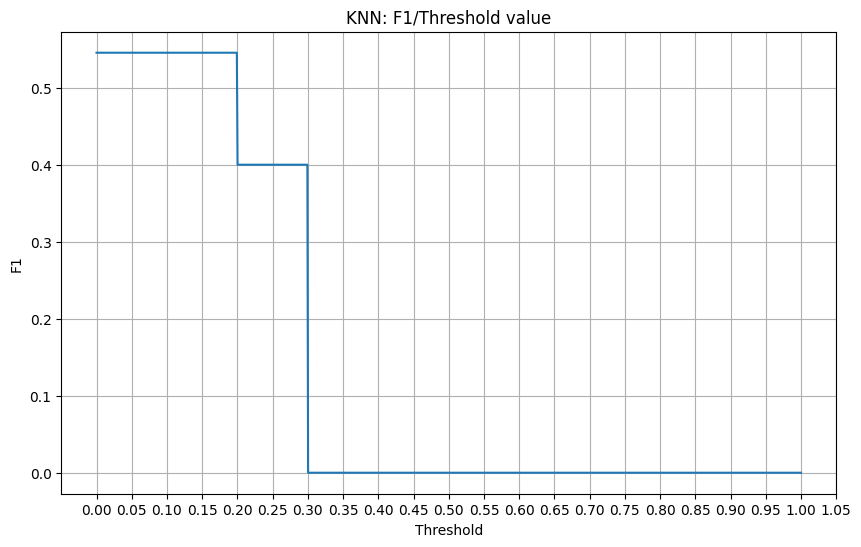

In [20]:
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
#Сравнение качеств моделей
threshold_values = np.linspace(0, 1, 1000) # разбиение отрезка пороговых значений на маленькие кусочки
f1_values = [] # массив хранения значений F1-меры
y_values = knn_model.predict_proba(X_test_norm)[:, 1] # вероятности принадлежности к классу 1 (positive) из модели

# перебираем пороговые значения и вычисляем F1-меру для каждого
for threshold in threshold_values:
    y_pred = [1 if val >= threshold else 0 for val in y_values]
    f1 = f1_score(Y_test, y_pred)
    f1_values.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(threshold_values, f1_values)
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.grid(True)
plt.title('KNN: F1/Threshold value')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

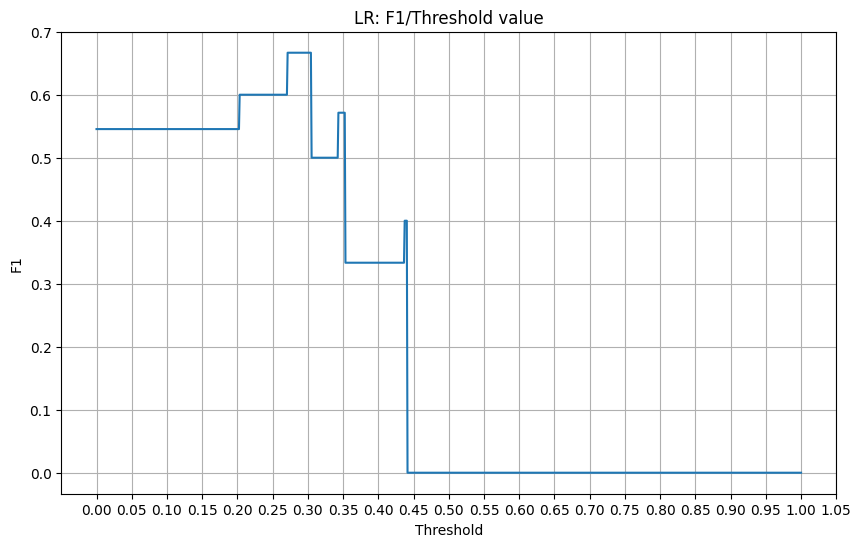

In [21]:
threshold_values = np.linspace(0, 1, 1000) # разбиение отрезка пороговых значений на маленькие кусочки
f1_values = [] # массив хранения значений F1-меры
y_values = lr_model.predict_proba(X_test_norm)[:, 1] # вероятности принадлежности к классу 1 (positive) из модели

# перебираем пороговые значения и вычисляем F1-меру для каждого
for threshold in threshold_values:
    y_pred = [1 if val >= threshold else 0 for val in y_values]
    f1 = f1_score(Y_test, y_pred)
    f1_values.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(threshold_values, f1_values)
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.grid(True)
plt.title('LR: F1/Threshold value')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

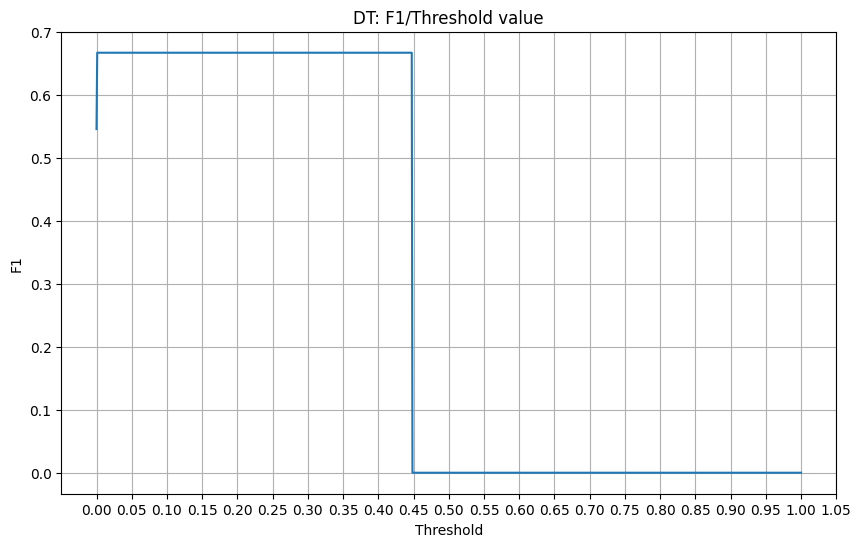

In [22]:
threshold_values = np.linspace(0, 1, 1000) # разбиение отрезка пороговых значений на маленькие кусочки
f1_values = [] # массив хранения значений F1-меры
y_values = dt_model.predict_proba(X_test_norm)[:, 1] # вероятности принадлежности к классу 1 (positive) из модели

# перебираем пороговые значения и вычисляем F1-меру для каждого
for threshold in threshold_values:
    y_pred = [1 if val >= threshold else 0 for val in y_values]
    f1 = f1_score(Y_test, y_pred)
    f1_values.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(threshold_values, f1_values)
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.grid(True)
plt.title('DT: F1/Threshold value')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#Определение параметров
knn_threshold = 0.1
logistic__threshold = 0.28
decision_tree_threshold = 0.22

print('DT')
print('Параметры на тренировочных данных:')

y_values = dt_model.predict_proba(X_test_norm)[:,1]
y_pred = [1 if val >= decision_tree_threshold else 0 for val in y_values]
print('Accuracy:', accuracy_score(Y_test, y_pred))
print('Precision:', precision_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred))
print('F1:', f1_score(Y_test, y_pred))
print('ROC-AUC:', roc_auc_score(Y_test, y_pred))

print()
print('Параметры на тестовых данных:')

y_values = dt_model.predict_proba(X_tr_norm)[:,1]
y_pred = [1 if val >= decision_tree_threshold else 0 for val in y_values]
print('Accuracy:', accuracy_score(Y_tr, y_pred))
print('Precision:', precision_score(Y_tr, y_pred))
print('Recall:', recall_score(Y_tr, y_pred))
print('F1:', f1_score(Y_tr, y_pred))
print('ROC-AUC:', roc_auc_score(Y_tr, y_pred))

DT
Параметры на тренировочных данных:
Accuracy: 0.625
Precision: 0.5
Recall: 1.0
F1: 0.6666666666666666
ROC-AUC: 0.7

Параметры на тестовых данных:
Accuracy: 0.5897435897435898
Precision: 0.4482758620689655
Recall: 1.0
F1: 0.6190476190476191
ROC-AUC: 0.6923076923076923


In [24]:
print(lr_model.best_estimator_.coef_)

[[ 0.0554022   0.          0.26974157 -0.57230169  0.         -0.42161613
  -0.09266302 -0.6335681   0.28663237]]


In [25]:
feature_importance = dt_model.best_estimator_.feature_importances_
print(feature_importance)

[1. 0. 0. 0. 0. 0. 0. 0. 0.]
